### Palomar 5 ("Pal5")

This is one of the streams in Adrian's "2nd regime": 

- Regime #1: GD-1 (d ~10 Mpc). Can study with Gaia.
- Regime #2: Pal5, ATLAS, Orphan(?) (d ~20-30 kpc). Data mostly from photometric surveys (i.e. no velocity), but only 5-10 stars in Gaia. 
- Regime #3: Fjorm etc. Too far/in the galactic disc. 

The data here is from a photometric survey, so we just have position-space info + color + magnitude. BUT we could try to scan along color space?!? 

The main research question here is if one of the tails of Pal5 is really shorter than the other, or if it's more of a consequence of another stream (Sagittarius) overlapping, or maybe the background is just higher there. 

z = infrared, r = red, g = green. The convention is to take the bluer band (higher frequency) - redder band (lower frequency), so that big numbers are bluer (high-frequency) and small numbers are redder (low-frequency). So we'll take g-z. 

In [12]:
import astropy.table as at
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib as mpl 

tbl = at.Table.read('../gaia_data/pal5/pal5_ls_lite_grz.fits').filled()
masks = at.Table.read('../gaia_data/pal5/cmd_masks_orig.fits')
pal5 = tbl[masks['grz_mask']]

df = pd.DataFrame(tbl['ra'])
df['dec'] = tbl['dec']
df['g'] = tbl['g']
df['r'] = tbl['r']
df['z'] = tbl['z']
df['stream'] = np.array(masks['grz_mask'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [19]:
def apply_cuts(df):
    ### Remove NaNs
    df = df[df.r < 1e10]
    df = df[df.z < 1e10]
    
    ### Remove outliers (bright stars)
    df = df[~((df.ra > 229.3) & (df.ra < 230) & (df.dec < 2.5) & (df.dec > 1.8))]
    df = df[~((df.ra > 217) & (df.ra < 218) & (df.dec < -5.8) & (df.dec > -6.5))]
    
    ### From 1910.00592
    df = df[df.g < 23] 
    df['x'] = df.g-df.r
    df['y'] = df.g-df.z
    df = df[(0 < df.x) & (df.x < 2)]
    df = df[(-1 < df.y) & (df.y < 5)]
    df = df[(df.y > 1.7*df.x - 0.24)]
    df = df[(df.y < 1.7*df.x - 0.1)] 
    return(df)

def plot(df): 
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8), dpi=150, tight_layout=True)

    ax = axs[0, 0]
    ax.hist2d(df.ra, df.dec, bins=1000);
    ax.set_xlabel(r'$\alpha$ [$\degree$]', fontsize=15)
    ax.set_ylabel(r'$\delta$ [$\degree$]', fontsize=15)
    ax.set_title('Full Dataset');
    ax.invert_xaxis()

    ax = axs[0, 1]
    ax.hist2d(df[df.stream].ra, df[df.stream].dec, bins=1000);
    ax.set_xlabel(r'$\alpha$ [$\degree$]', fontsize=15)
    ax.set_ylabel(r'$\delta$ [$\degree$]', fontsize=15)
    ax.set_title('Masked Dataset');
    ax.invert_xaxis()

    ax = axs[1,0]
    color_bins = [np.linspace(-0.5,1,300), np.linspace(14,26,300)]
    ax.hist2d((df.g - df.r), df.g, bins=color_bins);
    ax.set_xlabel('g-r', fontsize=15);
    ax.set_ylabel('g', fontsize=15);
    ax.invert_yaxis()

    ax = axs[1,1]
    ax.hist2d((df[df.stream].g - df[df.stream].r), df[df.stream].g, bins=color_bins);
    ax.set_xlabel('g-r', fontsize=15);
    ax.set_ylabel('g', fontsize=15);
    ax.invert_yaxis()

In [20]:
df = apply_cuts(df)

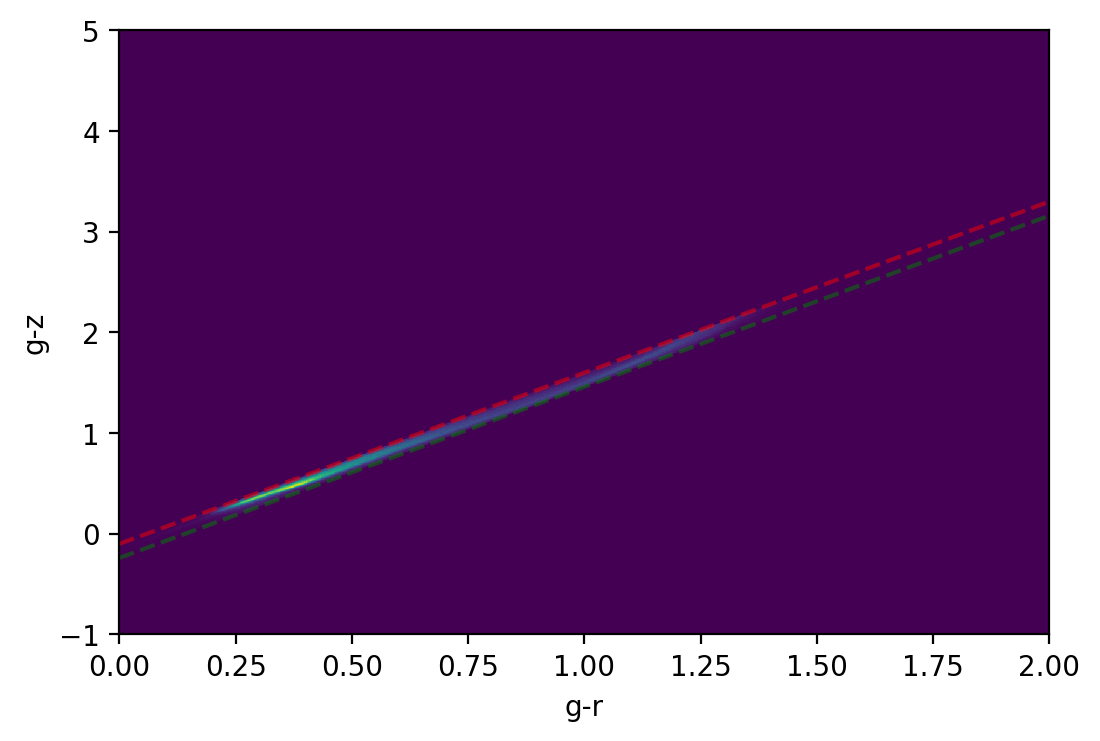

In [21]:
plt.figure(dpi=200)
x = np.linspace(0,2,1000)
y = 1.7*x - 0.17
y_plus = 1.7*x - 0.1
y_minus = 1.7*x - 0.24

plt.hist2d(df.g - df.r, df.g - df.z, bins=[np.linspace(0,2,1000), np.linspace(-1,5,1000)]);
# plt.plot(x, y, linestyle='dashed', alpha=0.5, color='orange');
plt.plot(x, y_plus, linestyle='dashed', alpha=0.5, color='red');
plt.plot(x, y_minus, linestyle='dashed', alpha=0.5, color='green');

plt.xlabel(r'g-r');
plt.ylabel(r'g-z');

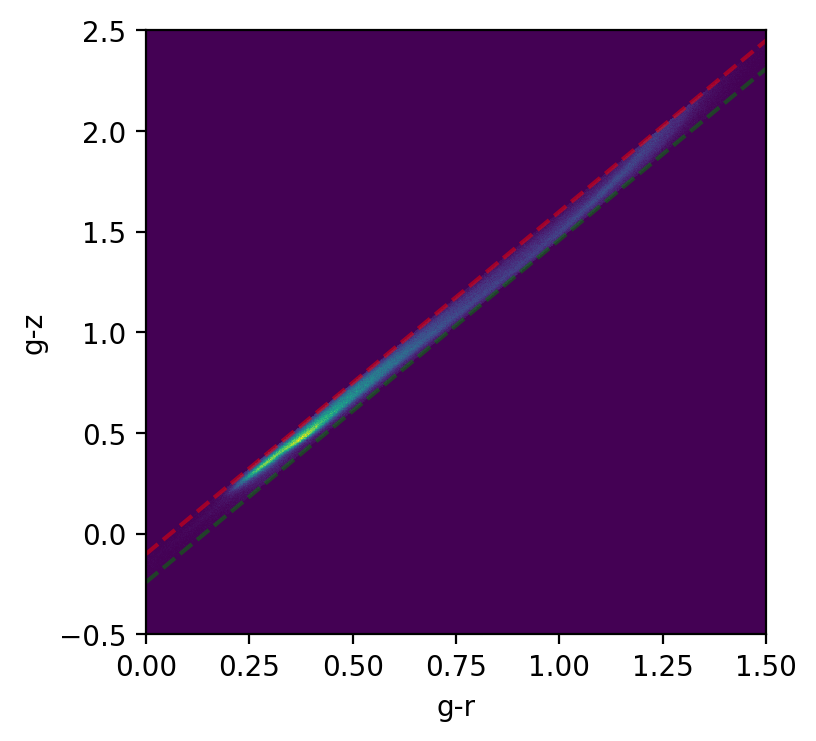

In [35]:
plt.figure(dpi=200, figsize=(4,4))
x = np.linspace(0,2,1000)
y = 1.7*x - 0.17
y_plus = 1.7*x - 0.1
y_minus = 1.7*x - 0.24

plt.hist2d(df.g - df.r, df.g - df.z, bins=[np.linspace(0,1.5,1000), np.linspace(-0.5,2.5,1000)]);
# plt.plot(x, y, linestyle='dashed', alpha=0.5, color='orange');
plt.plot(x, y_plus, linestyle='dashed', alpha=0.5, color='red');
plt.plot(x, y_minus, linestyle='dashed', alpha=0.5, color='green');

plt.xlabel(r'g-r');
plt.ylabel(r'g-z');

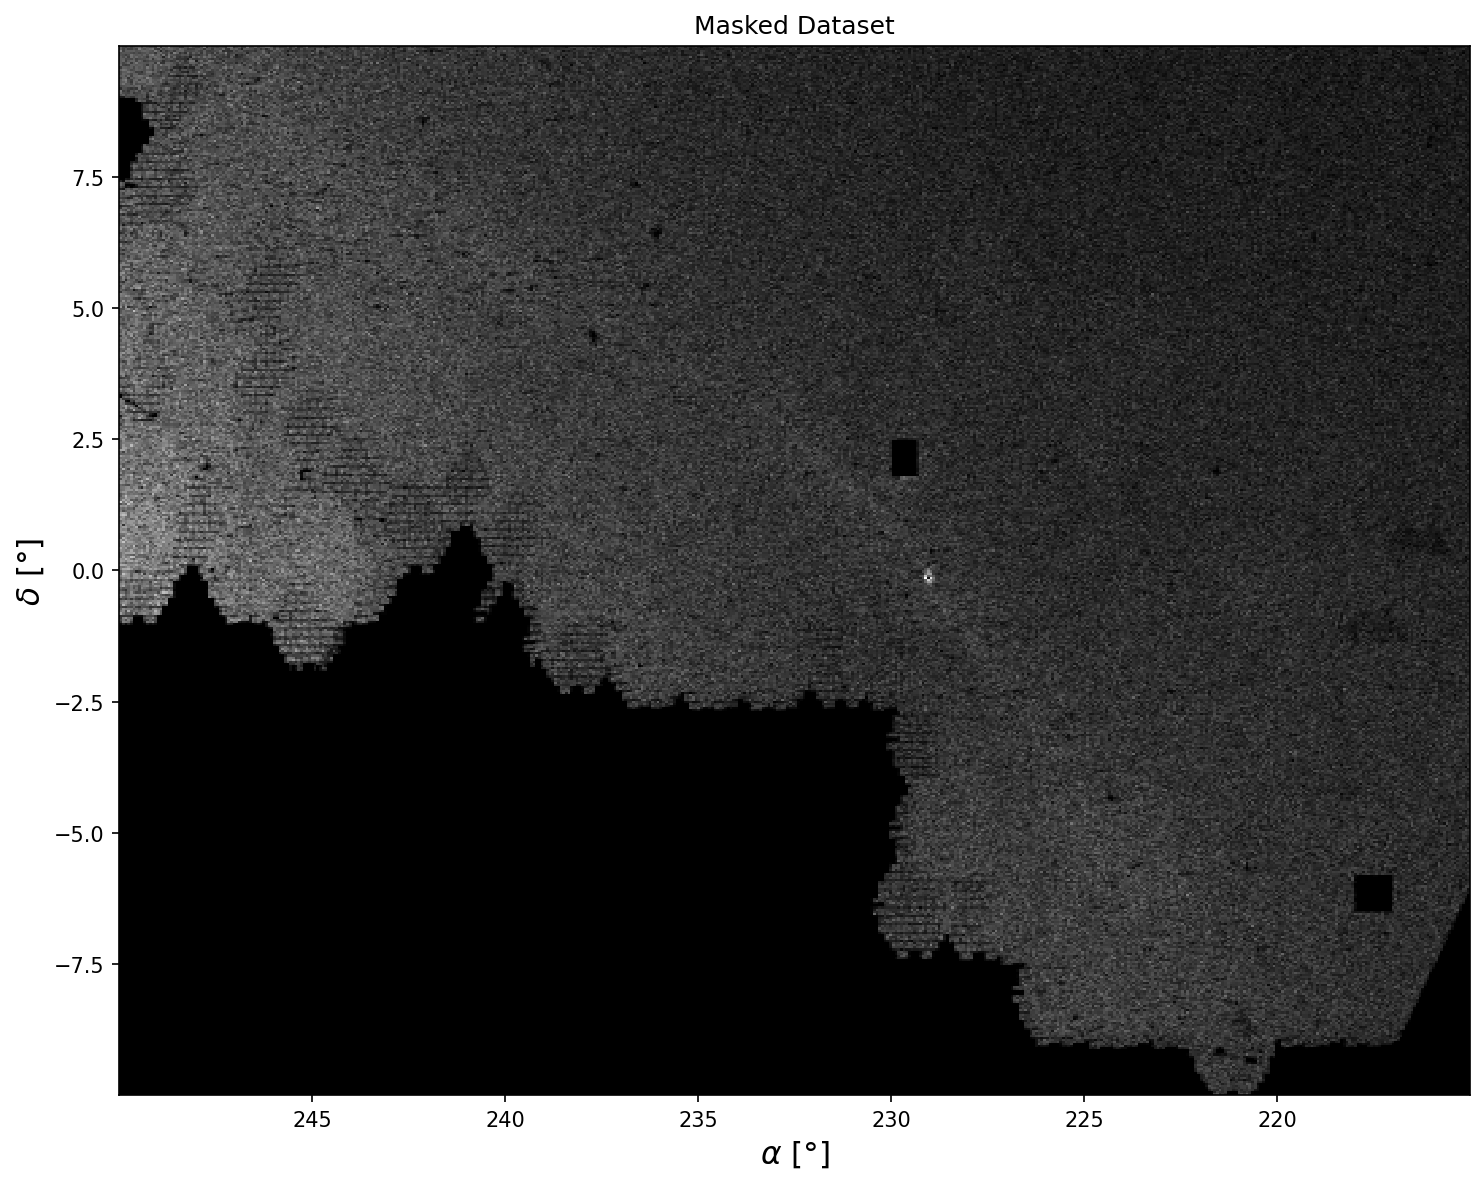

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8), dpi=150, tight_layout=True)
ax.hist2d(df[df.stream].ra, df[df.stream].dec, bins = 500, cmap=mpl.cm.gray)
ax.set_xlabel(r'$\alpha$ [$\degree$]', fontsize=15)
ax.set_ylabel(r'$\delta$ [$\degree$]', fontsize=15)
ax.set_title('Masked Dataset');
ax.invert_xaxis()

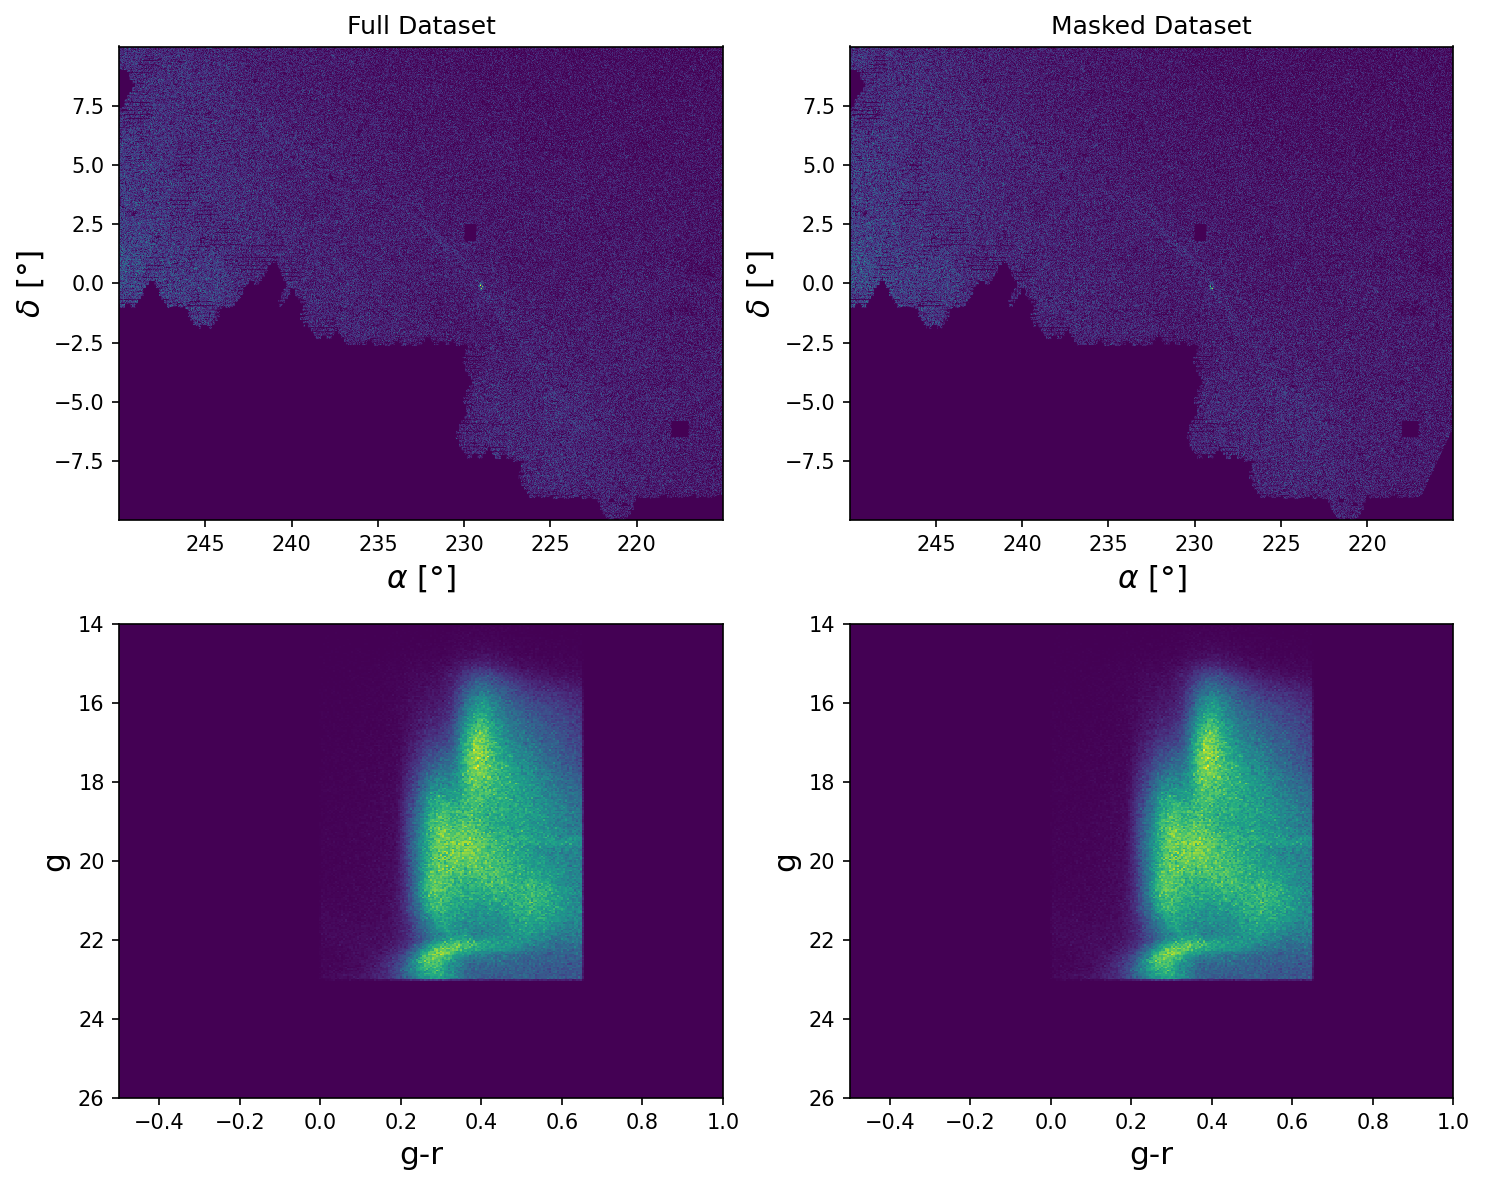

In [29]:
plot(df[(df.g-df.r < 0.65)])

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, dpi=200, tight_layout=True)

ax = axs[0,0]
ax.hist(df.ra, histtype="step", linewidth=2, density=True, label="All data")
ax.hist(df[df.stream].ra, histtype="step", linewidth=2, density=True , label="grz Mask");
ax.set_xlabel(r'$\alpha$', fontsize=14);
# ax.legend(loc='lower left');

ax = axs[0,1]
ax.hist(df.dec, histtype="step", linewidth=2, density=True, label="All data")
ax.hist(df[df.stream].dec, histtype="step", linewidth=2, density=True , label="grz Mask");
ax.set_xlabel(r'$\delta$', fontsize=14);
# ax.legend(loc='lower left');

ax = axs[1,0]
bins=np.linspace(-10, 10, 100)
ax.hist((df.g - df.z), histtype="step", linewidth=2, density=True, bins=bins, label="All data")
ax.hist(df[df.stream].g - df[df.stream].z, histtype="step", linewidth=2, density=True, bins=bins , label="grz Mask");
ax.set_xlabel(r'$g-z$', fontsize=14);
ax.legend(loc='upper left');

ax = axs[1,1]
bins=np.linspace(10, 30, 100)
ax.hist(df.r, histtype="step", linewidth=2, density=True, bins=bins, label="All data")
ax.hist(df[df.stream].r, histtype="step", linewidth=2, density=True, bins=bins, label="grz Mask");
ax.set_xlabel(r'$r$', fontsize=14);
# ax.legend(loc='lower left');

In [ ]:
plt.figure(dpi=150)
plt.hist2d(df.ra, df.dec, bins=100);
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\delta$')

In [ ]:
plt.figure(dpi=150)
plt.hist2d(df[((df.g - df.z) < 2) & ((df.g - df.z) > 0)].ra, 
           df[((df.g - df.z) < 2) & ((df.g - df.z) > 0)].dec, bins=100);
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\delta$');